# Imports

In [1]:
using Distributed, Statistics, GraphRecipes, BenchmarkTools, LinearAlgebra, LightGraphs, Plots, RCall

In [2]:
using OnlineStats

In [19]:
include("../base.jl")
include("../sa.jl")
include("../inference.jl")

ergm (generic function with 1 method)

In [4]:
n = 50
g_orig = erdos_renyi(n, 0.05; is_directed = true)
g_adj = convert(Array{Bool, 2}, collect(adjacency_matrix(g_orig)));

## A list of functions which define the model 

In [5]:
funcs = [delta_edge,
delta_mutual,
(g, i, j) -> delta_istar(g,i,j,2),
(g, i, j) -> delta_ostar(g,i,j,2),
delta_m2star,
delta_ttriple,
delta_ctriple,
(g, i, j) -> delta_nodeicov(g,i,j,"cov1"),
(g, i, j) -> delta_nodeocov(g,i,j,"cov1"),
(g, i, j) -> delta_nodediff(g,i,j,2,"cov1")]

10-element Array{Function,1}:
 delta_edge
 delta_mutual
 var"#25#30"()
 var"#26#31"()
 delta_m2star
 delta_ttriple
 delta_ctriple
 var"#27#32"()
 var"#28#33"()
 var"#29#34"()

## Generate "model template"

In [6]:
rand_covariate = randn(n)*0.1
m = erg(g_adj, funcs; realnodecov=Dict("cov1" => rand_covariate))

erg{Array{Bool,2},Function}(Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Function[delta_edge, delta_mutual, var"#25#30"(), var"#26#31"(), delta_m2star, delta_ttriple, delta_ctriple, var"#27#32"(), var"#28#33"(), var"#29#34"()], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Dict("cov1" => [0.06994848268565766, 0.003192611199859703, -0.012289796505887608, -0.0914480058397232, -0.11100673997782028, -0.01686286004005635, -0.07806349473328744, 0.027773020328166326, 0.15567050435331878, -0.018839845898400112  …  0.20281707356358405, 0.04296196356245017, -0.017367531410096292, 0.12867524894733848, -0.0115017711668913, -0.11755906515661688, -0.12803519047774992, -0.09013594780318103, -0.04916590778902883, -0.005215413974214949]), nothing, nothing, [1, 3, 4, 2, 2, 9, 1, 1, 5, 0  …  0, 1, 3, 3, 2, 0, 1, 1, 1, 4], [0, 2, 2, 5, 3, 4, 7, 2, 2, 1  …  1, 2, 3, 2, 3, 1, 3, 1, 1, 1], 10, [0.0 0.0 0.0; 1.0 0.0 0.0; … ; 48.0 1128.0 17296.0; 49.0 1176.0 18424.0])

## Generate target parameters

In [13]:
params = vcat(-2.5, randn(length(funcs)-1)*0.05)

10-element Array{Float64,1}:
 -2.5
  0.08126285059076016
 -0.04743091775164575
  0.04273762915359393
 -0.07347169377400924
 -0.05361475122086399
  0.14011866841812864
 -0.0012125660025946328
 -0.04880323835260493
 -0.04537963605413789

## Sample a random graph from the model with these parameters

In [14]:
g = rgraph(params,m,subgraphcount(m),500, return_graph=true)[2].m

50×50 Array{Bool,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  1  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  1  0  …  1  0  0  0  1  0  0  1  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  1  1  0  0  0  0  0  1  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     

In [15]:
sum(g)

128

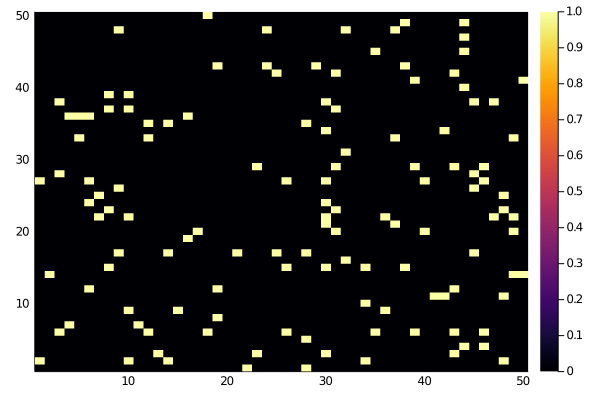

In [16]:
heatmap(g)

In [17]:
g_infer = erg(g, funcs; realnodecov=Dict("cov1" => rand_covariate))

erg{Array{Bool,2},Function}(Bool[0 0 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Function[delta_edge, delta_mutual, var"#25#30"(), var"#26#31"(), delta_m2star, delta_ttriple, delta_ctriple, var"#27#32"(), var"#28#33"(), var"#29#34"()], Bool[0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Dict("cov1" => [0.06994848268565766, 0.003192611199859703, -0.012289796505887608, -0.0914480058397232, -0.11100673997782028, -0.01686286004005635, -0.07806349473328744, 0.027773020328166326, 0.15567050435331878, -0.018839845898400112  …  0.20281707356358405, 0.04296196356245017, -0.017367531410096292, 0.12867524894733848, -0.0115017711668913, -0.11755906515661688, -0.12803519047774992, -0.09013594780318103, -0.04916590778902883, -0.005215413974214949]), nothing, nothing, [2, 1, 3, 2, 2, 4, 2, 4, 3, 5  …  1, 2, 5, 5, 4, 4, 2, 4, 4, 2], [2, 5, 4, 2, 1, 8, 2, 1, 3, 1  …  2, 3, 4, 0, 2, 0, 1, 4, 2, 1], 10, [0.0 0.0 0.0; 1.0 0.0 0.0; … ; 48.0 1128.0 17296.0; 49.0 1176.0 18424.0])

# MPLE

In [20]:
pl_est = pseudo_likelihood(g_infer)

GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}}:

Coefficients:
────────────────────────────────────────────────────────────────────────
       Estimate  Std. Error    z value  Pr(>|z|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────
x1    1.79461     0.386442    4.64393     <1e-5    1.0372      2.55202
x2    0.103634    0.432597    0.239562    0.8107  -0.744241    0.951509
x3    0.087972    0.0683757   1.2866      0.1982  -0.0460419   0.221986
x4   -0.0665361   0.0536299  -1.24065     0.2147  -0.171649    0.0385767
x5    0.194713    0.0498444   3.90641     <1e-4    0.0970193   0.292406
x6    0.226877    0.170338    1.33193     0.1829  -0.106978    0.560733
x7   -0.511505    0.289874   -1.76457     0.0776  -1.07965     0.056639
x8    1.16744     1.03954     1.12303     0.2614  -0.870022    3.2049
x9   -0.372345    1.07027    -0.347899    0.727

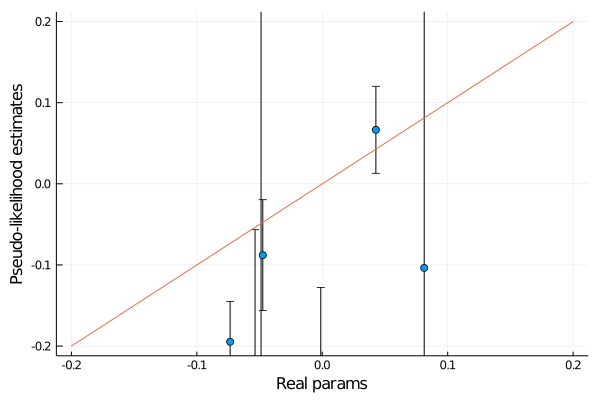

In [21]:
scatter(params,-coef(pl_est),yerror=stderror(pl_est),legend=false, ylabel="Pseudo-likelihood estimates",
    xlabel="Real params",xlim=[-0.2,0.2],ylim=[-0.2,0.2])
plot!([-0.2,0.2],[-0.2,0.2])

# Compare to R's ergm MCMLE

In [22]:
# Do the model in R/statnet to check to get "correct" values
# Verified that the models get same numbers, even after graph toggling
n1 = deepcopy(g_infer.m)
at1 = copy(g_infer.realnodecov["cov1"])

@rput n1
@rput at1
R"""
library(ergm)
n1a <- as.network(n1)
set.vertex.attribute(n1a, "cov1", at1)
rm1 <- ergm(n1a ~ edges + mutual + istar(2) + ostar(2) + m2star + ttriple + ctriple + nodeicov("cov1") + nodeocov("cov1") + absdiff("cov1", pow=2))
rm1a <- summary(n1a ~ edges + mutual + istar(2) + ostar(2) + m2star + ttriple + ctriple + nodeicov("cov1") + nodeocov("cov1") + absdiff("cov1", pow=2))
summary(rm1)$coefs$Estimate
summary(rm1)$coefs$"Std. Error"
rm2_mcmle <- cbind(summary(rm1)$coefs$Estimate, summary(rm1)$coefs$"Std. Error")
"""

@rget rm2_mcmle

┌ Warning: RCall.jl: Loading required package: network
│ network: Classes for Relational Data
│ Version 1.16.0 created on 2019-11-30.
│ copyright (c) 2005, Carter T. Butts, University of California-Irvine
│                     Mark S. Handcock, University of California -- Los Angeles
│                     David R. Hunter, Penn State University
│                     Martina Morris, University of Washington
│                     Skye Bender-deMoll, University of Washington
│  For citation information, type citation("network").
│  Type help("network-package") to get started.
│ 
│ 
│ ergm: version 3.10.4, created on 2019-06-10
│ Copyright (c) 2019, Mark S. Handcock, University of California -- Los Angeles
│                     David R. Hunter, Penn State University
│                     Carter T. Butts, University of California -- Irvine
│                     Steven M. Goodreau, University of Washington
│                     Pavel N. Krivitsky, University of Wollongong
│                   

10×2 Array{Float64,2}:
 -1.79123    0.631331
 -0.1193     0.602197
 -0.0893697  0.108936
  0.0654486  0.0715983
 -0.188829   0.0765115
 -0.231478   0.292057
  0.458109   0.491893
 -1.18073    1.16971
  0.27202    1.00103
 -8.92197    4.879

# Compare to R's ergm SA

In [23]:
# Do the model in R/statnet to check to get "correct" values
# Verified that the models get same numbers, even after graph toggling
n1 = deepcopy(g_infer.m)
at1 = copy(g_infer.realnodecov["cov1"])

@rput n1
@rput at1
R"""
library(ergm)
n1a <- as.network(n1)
set.vertex.attribute(n1a, "cov1", at1)
rm1 <- ergm(n1a ~ edges + mutual + istar(2) + ostar(2) + m2star + ttriple + ctriple + nodeicov("cov1") + nodeocov("cov1") + absdiff("cov1", pow=2),
control=control.ergm(main.method = "Stochastic-Approximation"))
rm1a <- summary(n1a ~ edges + mutual + istar(2) + ostar(2) + m2star + ttriple + ctriple + nodeicov("cov1") + nodeocov("cov1") + absdiff("cov1", pow=2))
summary(rm1)$coefs$Estimate
summary(rm1)$coefs$"Std. Error"
rm2 <- cbind(summary(rm1)$coefs$Estimate, summary(rm1)$coefs$"Std. Error")
"""

@rget rm2
@rget rm1a

        edges        mutual        istar2        ostar2        m2star 
  -1.79460658   -0.10363405   -0.08797225    0.06653616   -0.19471328 
      ttriple       ctriple nodeicov.cov1 nodeocov.cov1 absdiff2.cov1 
  -0.22687810    0.51150685   -1.16745188    0.37236291   -8.28245964 
Starting burnin of 16384 steps
Phase 1: 200 steps (interval = 1024)
Returned from Phase 1

 gain times inverse variances:
 0.001471 0.033979 0.000164 0.000115 0.000061 0.004367 0.017602 0.115160 0.082350 1.512077
Phase 2: (samplesize = 694)
End of iteration 1; Updating the number of sub-phases to be 43
theta_1 = -1.754893; change statistic[1] = -9.000000
theta_2 = -0.001696; change statistic[2] = 0.000000
theta_3 = -0.085834; change statistic[3] = -30.000000
theta_4 = 0.077542; change statistic[4] = -47.000000
theta_5 = -0.184789; change statistic[5] = -40.000000
theta_6 = -0.183211; change statistic[6] = -4.000000
theta_7 = 0.599518; change statistic[7] = 1.000000
theta_8 = -1.730956; change statistic[8] =

┌ Warning: RCall.jl: Starting maximum pseudolikelihood estimation (MPLE):
│ Evaluating the predictor and response matrix.
│ Maximizing the pseudolikelihood.
│ Finished MPLE.
│ Stochastic approximation algorithm with theta_0 equal to:
│ MCMC workspace is  20000 .
│  (eta[1] = -1.78807964141593) (eta[2] = -0.122747363061242) (eta[3] = -0.0893598594205508) (eta[4] = 0.0667726240357119) (eta[5] = -0.190179983944795) (eta[6] = -0.218144623927979) (eta[7] = 0.450999200809812) (eta[8] = -1.24193576331733) (eta[9] = 0.19274547758021) (eta[10] = -8.94208231748947)
│ Phase 3:  1000 iterations (interval=1024)
│ Evaluating log-likelihood at the estimate. Using 20 bridges: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 .
│ This model was fit using MCMC.  To examine model diagnostics and check
│ for degeneracy, use the mcmc.diagnostics() function.
└ @ RCall /Users/adamhaber/.julia/packages/RCall/Qzssx/src/io.jl:160


10-element Array{Float64,1}:
 128.0
   3.0
 158.0
 182.0
 271.0
  13.0
   5.0
  -0.7816570101621189
   0.7108631211466503
   1.867290654906417

# Julia SA

In [27]:
theta_sa, theta_sa_cov = stochastic_approximation(g_infer, -coef(pl_est))

([-1.7965902590499003, -0.09223078020547329, -0.09192973734588779, 0.07074680242029352, -0.18812778992613852, -0.22105100676066855, 0.4574878146980496, -1.201722450575654, 0.15243888157728608, -9.26403970596253], [0.39575853772789793 -0.05138033971932085 … -0.05147264365038192 -0.7515498075601549; -0.05138033971932072 0.3645074831075511 … 0.0010083726903338027 0.21291154313317645; … ; -0.05147264365038192 0.0010083726903339103 … 0.9693632695371379 -1.2864704973739722; -0.7515498075601544 0.21291154313317645 … -1.2864704973739725 24.48539151535816])

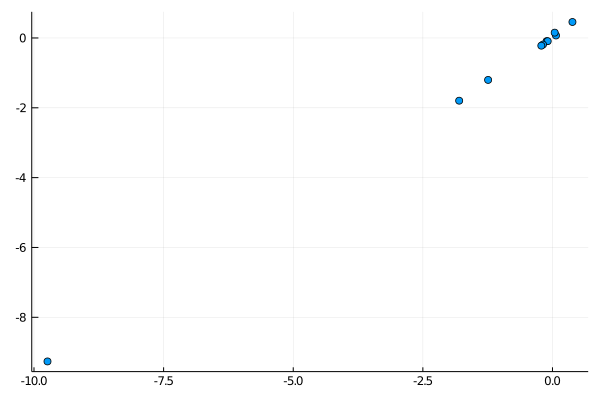

In [32]:
scatter(rm2[:,1],theta_sa, legend=false)

### MLE according to the different methods

In [33]:
hcat(params, rm2_mcmle[:,1],rm2[:,1],theta_sa,-coef(pl_est))

10×5 Array{Float64,2}:
 -2.5         -1.79123    -1.79968    -1.79659    -1.79461
  0.0812629   -0.1193     -0.113552   -0.0922308  -0.103634
 -0.0474309   -0.0893697  -0.092258   -0.0919297  -0.087972
  0.0427376    0.0654486   0.0678966   0.0707468   0.0665361
 -0.0734717   -0.188829   -0.183109   -0.188128   -0.194713
 -0.0536148   -0.231478   -0.215076   -0.221051   -0.226877
  0.140119     0.458109    0.38501     0.457488    0.511505
 -0.00121257  -1.18073    -1.24156    -1.20172    -1.16744
 -0.0488032    0.27202     0.0426553   0.152439    0.372345
 -0.0453796   -8.92197    -9.73959    -9.26404    -8.28231

## Standard errors according to the different methods 

In [37]:
hcat(rm2_mcmle[:,2],rm2[:,2],sqrt.(diag(theta_sa_cov)), stderror(pl_est))

10×4 Array{Float64,2}:
 0.631331   0.627007   0.629093   0.386442
 0.602197   0.632308   0.603745   0.432597
 0.108936   0.106846   0.107237   0.0683757
 0.0715983  0.0702731  0.0703088  0.0536299
 0.0765115  0.0771776  0.0765085  0.0498444
 0.292057   0.28992    0.312763   0.170338
 0.491893   0.507678   0.49461    0.289874
 1.16971    1.1354     1.16505    1.03954
 1.00103    1.03126    0.984562   1.07027
 4.879      4.71895    4.94827    4.70213